Year Over Year Comparison Data:
- Total number of donations processed from Oct. 1st 2020 - Oct. 1st 2021
- Total number of donations processed from Oct. 1st 2019 - October 1st 2020
- Total dollar amount raised on the qgiv platform from Oct. 1st 2020 - Oct. 1st 2021
- Total dollar amount raised on the qgiv platform from Oct. 1st 2019 - Oct. 1st 2020
- Total dollar amount raised (% increase or decrease) on peer-to-peer year over year (Oct 2020-2021/Oct 2019-2020).
- Total dollar amount raised (% increase or decrease) on auctions year over year (Oct 2020-2021/Oct 2019-2020).
- Total dollar amount raised (% increase or decrease) on forms year over year (Oct 2020-2021/Oct 2019-2020).
- Total dollar amount raised (% increase or decrease) on mobile suite year over year (Oct 2020-2021/Oct 2019-2020).

In [145]:
import pandas as pd

import sys
sys.path.insert(1, '../../scripts/')
from s3_support import *
%matplotlib inline

In [146]:
q = "select date, id, form, amount, source from transactions where status='A' and date>='2019-10-01'"
trans_all = redshift_query_read(q, schema='public')
trans_all = trans_all[trans_all['amount']!=99999999.99]
trans_all = trans_all[~trans_all['id'].isin([12774333, 10273991, 10274118, 10289482,
                                8656420, 10284495])]

In [183]:
len(trans_all), len(trans_all.drop_duplicates())

(4362081, 4362081)

AxesSubplot(0.125,0.125;0.775x0.755)


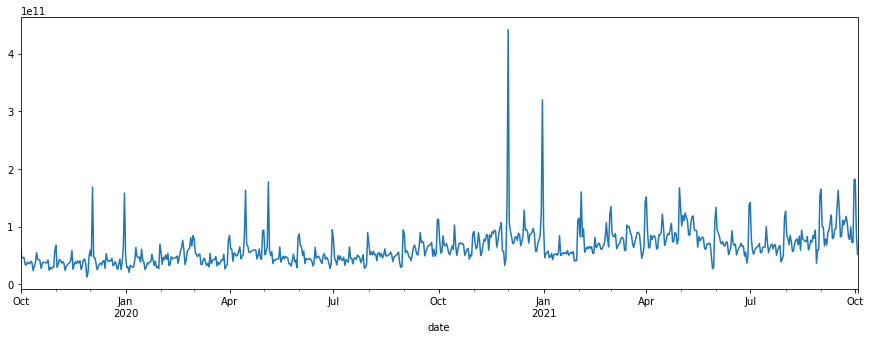

In [147]:
print(trans_all.groupby('date')['id'].sum().plot(figsize=(15,5)))

AxesSubplot(0.125,0.125;0.775x0.755)


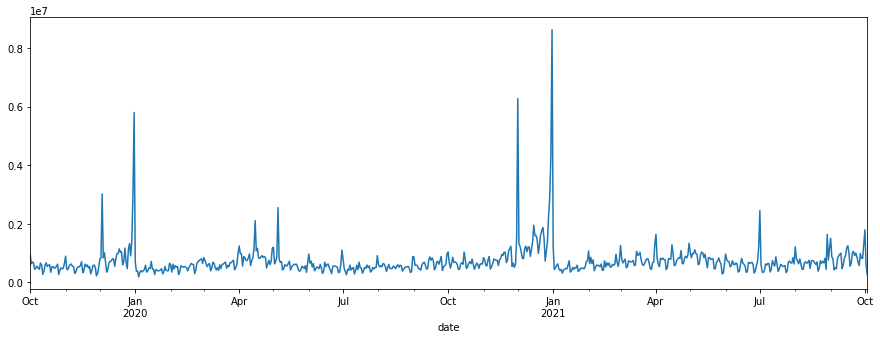

In [148]:
print(trans_all.groupby('date')['amount'].sum().plot(figsize=(15,5)))

In [181]:
trans_all.sort_values('amount', ascending=False).head(15)

,date,id,form,amount,source,count
3404615,2021-05,12239663,972086,100005.0,don_form,1
2276106,2020-12,10942101,963295,100000.0,p2p,1
1368144,2019-12,8581222,43057,100000.0,don_form,1
2392823,2020-12,11080069,962802,100000.0,don_form,1
3138922,2021-03,11892499,928202,100000.0,don_form,1
3694528,2021-06,12614264,962802,97500.0,don_form,1
1146392,2019-12,8436897,939594,70000.0,don_form,1
1433018,2019-12,8436911,939594,65000.0,don_form,1
788558,2020-08,10115215,928052,60000.0,don_form,1
3970384,2021-08,12934471,928052,60000.0,don_form,1


In [150]:
trans_all['date'] = pd.to_datetime(trans_all['date'])
trans_all['date'] = trans_all['date'].dt.to_period('M')
trans_all['count'] = 1
trans = trans_all.groupby(['date', 'source'])[['count', 'amount']].sum().reset_index()

In [151]:
trans.tail(3)

,date,source,count,amount
222,2021-10,p2p,2821,249482.14
223,2021-10,sms,121,10327.06
224,2021-10,vt,1765,218838.60


# all sources

In [152]:
trans_total = trans.groupby('date')[['count', 'amount']].sum().reset_index()
trans_total.tail(3)

,date,count,amount
22,2021-08,184712,22374348.70
23,2021-09,231720,25838187.56
24,2021-10,23716,2675069.87


In [153]:
# Oct. 1st 2020 - Oct. 1st 2021
# Oct. 1st 2019 - October 1st 2020
total_2020 = trans_total[trans_total['date']<'2020-10-01'][['count', 'amount']].sum().reset_index()
total_2021 = trans_total[trans_total['date']>='2020-10-01'][['count', 'amount']].sum().reset_index()

In [154]:
total_2020['range'] = '2019/10 - 2020/10'
total_2021['range'] = '2020/10 - 2021/10'

In [155]:
print("All sources:")
annual_totals = total_2020.append(total_2021)
annual_totals.columns = ['metric', 'total', 'range']
annual_totals = annual_totals.pivot(index='range', columns='metric', values='total').reset_index()
annual_totals['count growth'] = annual_totals['count'].pct_change()
annual_totals['amount growth'] = annual_totals['amount'].pct_change()
annual_totals.transpose().reset_index()

All sources:


,metric,0,1
0,range,2019/10 - 2020/10,2020/10 - 2021/10
1,amount,230653605.23,297570443.62
2,count,1908586.0,2453495.0
3,count growth,NaN,0.285504
4,amount growth,NaN,0.290118


# specific sources

## auctions

In [156]:
# get auction donations & purchases
q = "select form from transauction"
df_purchases = redshift_query_read(q, schema="production")

q = "select form from transauctiondonation"
df_donations = redshift_query_read(q, schema="production")

In [157]:
auction_forms = df_purchases.append(df_donations)['form'].unique()

In [158]:
len(auction_forms)

514

In [159]:
trans_total = trans_all[trans_all['form'].isin(auction_forms)].groupby(['date', 'source'])[['count', 'amount']].sum().reset_index()

In [160]:
# Oct. 1st 2020 - Oct. 1st 2021
# Oct. 1st 2019 - October 1st 2020
total_2020 = trans_total[trans_total['date']<'2020-10-01'][['count', 'amount']].sum().reset_index()
total_2021 = trans_total[trans_total['date']>='2020-10-01'][['count', 'amount']].sum().reset_index()

total_2020['range'] = '2019/10 - 2020/10'
total_2021['range'] = '2020/10 - 2021/10'

In [161]:
print("auctions:")
annual_totals = total_2020.append(total_2021)
annual_totals.columns = ['metric', 'total', 'range']
annual_totals = annual_totals.pivot(index='range', columns='metric', values='total').reset_index()
annual_totals['count growth'] = annual_totals['count'].pct_change()
annual_totals['amount growth'] = annual_totals['amount'].pct_change()
annual_totals.transpose().reset_index()

auctions:


,metric,0,1
0,range,2019/10 - 2020/10,2020/10 - 2021/10
1,amount,2447721.07,4669703.29
2,count,18429.0,38073.0
3,count growth,NaN,1.065929
4,amount growth,NaN,0.907776


## p2p

In [162]:
trans_total = trans[trans['source']=='p2p'].groupby('date')[['count', 'amount']].sum().reset_index()
trans_total.tail(3)

,date,count,amount
22,2021-08,26014,2490658.25
23,2021-09,48043,4294470.31
24,2021-10,2821,249482.14


In [163]:
# Oct. 1st 2020 - Oct. 1st 2021
# Oct. 1st 2019 - October 1st 2020
total_2020 = trans_total[trans_total['date']<'2020-10-01'][['count', 'amount']].sum().reset_index()
total_2021 = trans_total[trans_total['date']>='2020-10-01'][['count', 'amount']].sum().reset_index()

total_2020['range'] = '2019/10 - 2020/10'
total_2021['range'] = '2020/10 - 2021/10'

In [164]:
print("P2P:")
annual_totals = total_2020.append(total_2021)
annual_totals.columns = ['metric', 'total', 'range']
annual_totals = annual_totals.pivot(index='range', columns='metric', values='total').reset_index()
annual_totals['count growth'] = annual_totals['count'].pct_change()
annual_totals['amount growth'] = annual_totals['amount'].pct_change()
annual_totals.transpose().reset_index()

P2P:


,metric,0,1
0,range,2019/10 - 2020/10,2020/10 - 2021/10
1,amount,25749062.01,36382726.54
2,count,307812.0,369250.0
3,count growth,NaN,0.199596
4,amount growth,NaN,0.412973


## sms

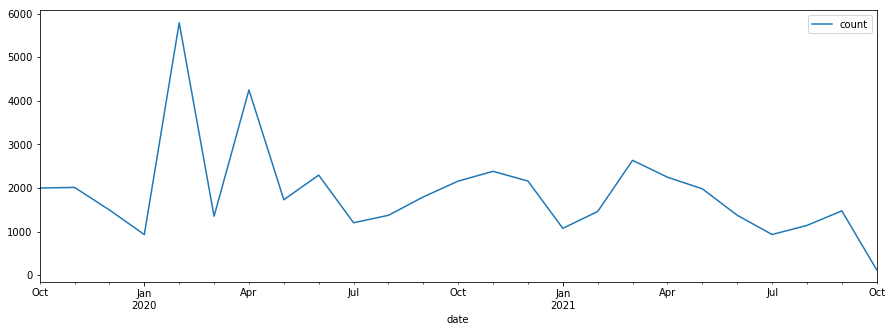

In [185]:
trans[trans['source'].isin(['sms'])].plot(x='date', y='count', figsize=(15,5))

In [173]:
trans_total = trans[trans['source'].isin(['sms'])].groupby('date')[['count', 'amount']].sum().reset_index()
trans_total.tail(3)

,date,count,amount
22,2021-08,1140,128863.33
23,2021-09,1474,182748.58
24,2021-10,121,10327.06


In [174]:
# Oct. 1st 2020 - Oct. 1st 2021
# Oct. 1st 2019 - October 1st 2020
total_2020 = trans_total[trans_total['date']<'2020-10-01'][['count', 'amount']].sum().reset_index()
total_2021 = trans_total[trans_total['date']>='2020-10-01'][['count', 'amount']].sum().reset_index()

total_2020['range'] = '2019/10 - 2020/10'
total_2021['range'] = '2020/10 - 2021/10'

In [176]:
print("SMS:")
annual_totals = total_2020.append(total_2021)
annual_totals.columns = ['metric', 'total', 'range']
annual_totals = annual_totals.pivot(index='range', columns='metric', values='total').reset_index()
annual_totals['count growth'] = annual_totals['count'].pct_change()
annual_totals['amount growth'] = annual_totals['amount'].pct_change()
annual_totals.transpose().reset_index()

SMS:


,metric,0,1
0,range,2019/10 - 2020/10,2020/10 - 2021/10
1,amount,2202711.72,2262087.36
2,count,26212.0,21128.0
3,count growth,NaN,-0.193957
4,amount growth,NaN,0.026956


## frontend & mobile

In [169]:
trans_total = trans[(trans['source'].isin(['don_form', 'mobile']))&(~trans_all['form'].isin(auction_forms))].groupby('date')[['count', 'amount']].sum().reset_index()
trans_total.tail(3)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,count,amount
22,2021-08,139669,17405250.55
23,2021-09,162661,18512213.09
24,2021-10,18403,2129597.90


In [170]:
# Oct. 1st 2020 - Oct. 1st 2021
# Oct. 1st 2019 - October 1st 2020
total_2020 = trans_total[trans_total['date']<'2020-10-01'][['count', 'amount']].sum().reset_index()
total_2021 = trans_total[trans_total['date']>='2020-10-01'][['count', 'amount']].sum().reset_index()

In [171]:
total_2020['range'] = '2019/10 - 2020/10'
total_2021['range'] = '2020/10 - 2021/10'

In [172]:
print("Don form & mobile:")
annual_totals = total_2020.append(total_2021)
annual_totals.columns = ['metric', 'total', 'range']
annual_totals = annual_totals.pivot(index='range', columns='metric', values='total').reset_index()
annual_totals['count growth'] = annual_totals['count'].pct_change()
annual_totals['amount growth'] = annual_totals['amount'].pct_change()
annual_totals.transpose().reset_index()

Don form & mobile:


,metric,0,1
0,range,2019/10 - 2020/10,2020/10 - 2021/10
1,amount,181443464.41,232196140.61
2,count,1378536.0,1855027.0
3,count growth,NaN,0.34565
4,amount growth,NaN,0.279716
